<a href="https://colab.research.google.com/github/Lakshita2002/CIFAR10/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
cifar_data = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train, y_train = cifar_data[0]
x_test, y_test = cifar_data[1]

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
print(y_train[4])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
input_layer = tf.keras.layers.Input(shape = (32, 32, 3))
hidden_layer_1 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.keras.activations.relu)(input_layer)
hidden_layer_2 = tf.keras.layers.Conv2D(128, kernel_size=(4, 4), activation=tf.keras.activations.relu)(hidden_layer_1)
flatten_layer = tf.keras.layers.Flatten()(hidden_layer_2)
hidden_layer_3 = tf.keras.layers.Dense(256, activation=tf.keras.activations.relu)(flatten_layer)
output_layer = tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)(hidden_layer_3)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 128)       131200    
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               23888128  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 24,023,690
Trainable params: 24,023,690
Non-trainable params: 0
_________________________________________________

In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])
his = model.fit(x_train, y_train, batch_size = 1000, epochs = 20)

Epoch 1/20
50/50 [==============================] - 16s 320ms/step - loss: 1.7973 - accuracy: 0.3506
Epoch 2/20
50/50 [==============================] - 16s 321ms/step - loss: 1.2730 - accuracy: 0.5494
Epoch 3/20
50/50 [==============================] - 16s 323ms/step - loss: 1.0825 - accuracy: 0.6189
Epoch 4/20
50/50 [==============================] - 16s 326ms/step - loss: 0.9314 - accuracy: 0.6742
Epoch 5/20
50/50 [==============================] - 16s 326ms/step - loss: 0.8101 - accuracy: 0.7215
Epoch 6/20
50/50 [==============================] - 16s 326ms/step - loss: 0.6963 - accuracy: 0.7623
Epoch 7/20
50/50 [==============================] - 16s 326ms/step - loss: 0.5954 - accuracy: 0.7968
Epoch 8/20
50/50 [==============================] - 16s 326ms/step - loss: 0.5047 - accuracy: 0.8315
Epoch 9/20
50/50 [==============================] - 16s 327ms/step - loss: 0.4067 - accuracy: 0.8687
Epoch 10/20
50/50 [==============================] - 16s 326ms/step - loss: 0.3373 - accura

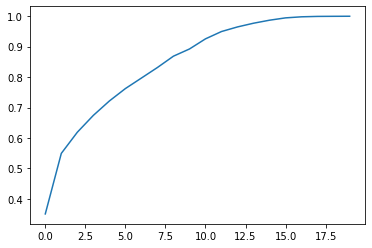

In [12]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])

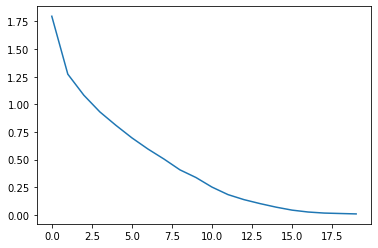

In [13]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])